In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

Читаем данные из csv

In [2]:
churn_data = pd.read_csv('https://github.com/nikolai-karpov/sf_data_science/blob/436abde6f542c832c4d840b521627df255d63aaa/data/churn.csv?raw=true')

Проверяем результат

In [3]:
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
display(churn_data.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Преобразование, подготовка данных

In [6]:

churn_data.drop(columns='RowNumber', inplace=True) # Избавляемся от ненужно строки

# Оптимизируем занимаемую память (уменьшаем занимаемую память в два раза)
churn_data['Age'] = churn_data['Age'].astype(np.int8)
churn_data['Tenure'] = churn_data['Tenure'].astype(np.int8)
churn_data['NumOfProducts'] = churn_data['NumOfProducts'].astype(np.int8)
churn_data['HasCrCard'] = churn_data['HasCrCard'].astype(np.int8)
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype(np.int8)
churn_data['Exited'] = churn_data['Exited'].astype(np.int8)

# Выделяем категориальные признаки
churn_data['Gender'] = churn_data['Gender'].astype('category')
churn_data['Geography'] = churn_data['Geography'].astype('category')



Задаем общий стиль

In [7]:
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
figsize = (6, 4)    # Для одного фрейма
figsize2 = (12, 4)  # Для двух фреймов
figsize3 = (16, 4)  # Для трёх фреймов

# 9.1. Соотношение ушедших и лояльных клиентов


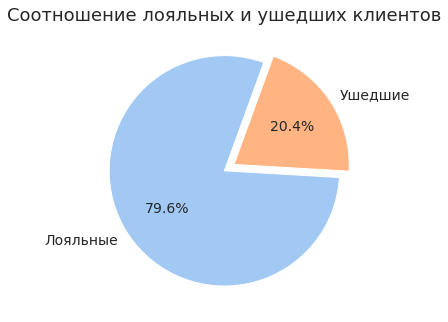

In [8]:
# Считаем сколько каждой категории и делим подсчитанных клиентов на их общее кол-во                                                                                                                
percentage = churn_data.groupby('Exited')['Exited'].count().transform(lambda x: x / churn_data.shape[0] * 100)

fig = plt.figure('9.1', figsize=figsize)
ax = fig.add_axes([0,0,1,1])
labels = ['Лояльные', 'Ушедшие'] # Присваем список категорий для последующего использования

ax.pie(
    percentage, 
    explode=[0, 0.1],           # Акцентируем долю ушедших
    labels=labels,              # Категории в соответствии с заданным ранее списком
    autopct='%1.1f%%',          # Процентное отображение долей пирога
    textprops={'fontsize': 14},
    startangle=70,              # Вращаем пирог для премещение акцента выше
    colors=colors               # Цвета в соответствии с заданными ранее стандартами
)

ax.set_title('Соотношение лояльных и ушедших клиентов', fontsize=18);

plt.show()

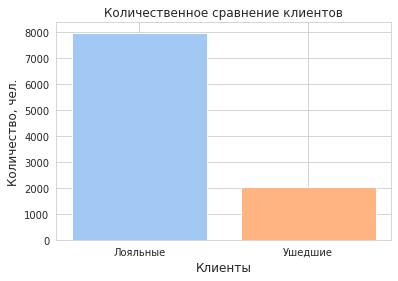

In [9]:
exited_data = churn_data['Exited'].value_counts() # В результате получим кол-во единиц (Ушедших) и нулей (Лояльных)

fig = plt.figure('9.1.1', figsize=figsize)
plt.bar(
    labels,
    exited_data,  # Список статусов клиентов
    color=colors  # Цвета в соответствии с заданными ранее стандартами
)

plt.title('Количественное сравнение клиентов', fontsize=12)
plt.xlabel('Клиенты', fontsize=12)
plt.ylabel('Количество, чел.', fontsize=12);

plt.show()

Комментарий
-----------
В банк пришло 10 тыс клиентов из которых 2037 чел. ушло.

Лояльных 7963 чел.


Выводы
-----------
Соотношение ушедших клиентов к лояльным составляет 1:4.

Иначе говоря, из каждых пяти пришедших клиентов остаются лишь четыре, а один уходит.

# 9.2. Распределение баланса пользователей, у которых на счету больше 2 500

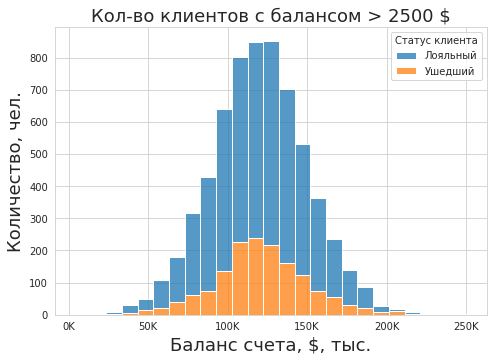

In [10]:
sorted_2500 = churn_data[churn_data['Balance'] > 2500]                          # Делаем выборку клиентов у которых на счету больше 2 500 долларов.
summary_table_9_2 = sorted_2500.copy()[['Balance', 'Exited']]
summary_table_9_2['Статус клиента'] = summary_table_9_2['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')# Добавляем признак Статус клиента
summary_table_9_2.rename(columns={'Exited': 'Count'}, inplace=True)             # Переименовываем столбец счетчик

fig = plt.figure('9.2.1', figsize=figsize)
ax = fig.add_axes([0,0,1,1])

sns.histplot(
    data=summary_table_9_2, 
    x="Balance",          # По горизонтале размеры сумм на банковских счетах клиентов
    hue="Статус клиента",   # Группирующая переменная, которая будет создавать точки разных цветов
    multiple="stack",     # “layer” - один слой закроет второй, 
                          # “dodge” - столбцы не будут накладываться друг на друга, 
                          # “fill” - показывает в процентном соотношении
    bins = 25
)

ax.get_xticks(minor=False) # Строка необходима чтоб не выпадало предупреждение (в колабе не актуально)
ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000]) # округление по оси X

ax.set_title('Кол-во клиентов с балансом > 2500 $', fontsize=18)
ax.set_xlabel('Баланс счета, $, тыс.', fontsize=18)
ax.set_ylabel('Количество, чел.', fontsize=18);

plt.show()

Комментарий
----------- 
*   Средняя сумма на счету у ушедших клиентов - 120 тыс. 
*   Средняя сумма на счету у лояльных клиентов - 130 тыс. 
*   Максимальный размер банковского счета более 220 тыс.


Вывод
-----------
*   Наблюдается отток клиентов обладающих накоплениями в диапазоне от 100 тыс. до 150 тыс.
*   Банковские услуги не интересны клиентам имеющим более 250 тыс.

# 9.3. Распределение баланса клиента в разрезе признака оттока.

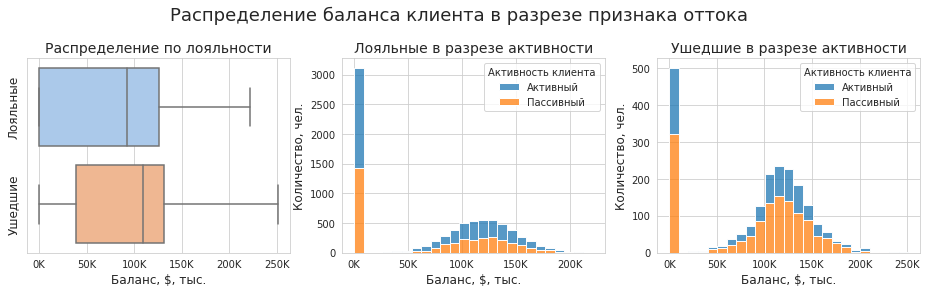

На счетах банка:  579270798.25
Выведено со счетов банка ушедшими:  185588094.63
Активными клиентами выведено:  67120667.81
Потенциально недополученный оборот 12 %


In [11]:
fig = plt.figure('9.3', figsize=figsize3)
fig.subplots_adjust(top=0.8)
fig.suptitle('Распределение баланса клиента в разрезе признака оттока', fontsize=18)

axes = fig.subplots(1, 3)
ax = axes[0]
ax1 = axes[1]
ax2 = axes[2]

sns.boxplot(
    ax=ax, 
    data=churn_data, 
    y='Exited', 
    x='Balance', 
    orient='h',                   # Горизонтальная расположение
    palette=[colors[0], colors[1]]
)


ax.get_xticks(minor=False)
ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000])
ax.set_yticklabels(['Лояльные', 'Ушедшие'], fontsize=12, rotation=90, va='center')

ax.set_title('Распределение по лояльности', fontsize=14)
ax.set_xlabel('Баланс, $, тыс.', fontsize=12)
ax.set_ylabel('')


summary_table_9_3 = churn_data.copy()[['Balance', 'IsActiveMember', 'Exited']]                                # Делаем выборку Статус клиента и его данные активности и размер счета
summary_table_9_3['Exited'] = summary_table_9_3['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')  # Добавляем признак Статус клиента
summary_table_9_3['IsActiveMember'] = summary_table_9_3['IsActiveMember'].apply(lambda x: 'Активный' if x == 1 else 'Пассивный')# Добавляем признак Статус клиента
summary_table_9_3.rename(columns={'Exited': 'Статус клиента'}, inplace=True)                           # Переименовываем для легенды столбец Статус клиента
summary_table_9_3.rename(columns={'IsActiveMember': 'Активность клиента'}, inplace=True)                # Переименовываем для легенды столбец Активность клиента

# Лояльные
loyal_clients = summary_table_9_3[summary_table_9_3['Статус клиента'] == 'Лояльный'].reset_index() 
sns.histplot(
    ax=ax1,
    data=loyal_clients,
    x="Balance",          # По горизонтале размеры сумм на банковских счетах клиентов
    hue="Активность клиента",   # Группирующая переменная, которая будет создавать точки разных цветов
    multiple="stack",     # “layer” - один слой закроет второй, 
                          # “dodge” - столбцы не будут накладываться друг на друга, 
                          # “fill” - показывает в процентном соотношении
    bins = 25
)

ax1.get_xticks(minor=False)
ax1.set_xticklabels([f"{round(x)}K" for x in ax1.get_xticks()/1000]) # округление по оси X

ax1.set_title('Лояльные в разрезе активности', fontsize=14)
ax1.set_xlabel('Баланс, $, тыс.', fontsize=12)
ax1.set_ylabel('Количество, чел.', fontsize=12)

# Ушедшие
unloyal_clients = summary_table_9_3[summary_table_9_3['Статус клиента'] == 'Ушедший'].reset_index()

sns.histplot(
    ax=ax2,
    data=unloyal_clients,
    x="Balance",          # По горизонтале размеры сумм на банковских счетах клиентов
    hue="Активность клиента",   # Группирующая переменная, которая будет создавать точки разных цветов
    multiple="stack",     # “layer” - один слой закроет второй, 
                          # “dodge” - столбцы не будут накладываться друг на друга, 
                          # “fill” - показывает в процентном соотношении
    bins = 25
)

ax2.get_xticks(minor=False)
ax2.set_xticklabels([f"{round(x)}K" for x in ax1.get_xticks()/1000]) # округление по оси X

ax2.set_title('Ушедшие в разрезе активности', fontsize=14)
ax2.set_xlabel('Баланс, $, тыс.', fontsize=12)
ax2.set_ylabel('Количество, чел.', fontsize=12);

plt.show()


# Дополнительная аналитика сверх задания
loyal_clients_balance = loyal_clients['Balance'].sum()
unloyal_clients_balance = unloyal_clients['Balance'].sum()
print('На счетах банка: ', loyal_clients_balance)
print('Выведено со счетов банка ушедшими: ', unloyal_clients_balance)

unloyal_clients_active = unloyal_clients[unloyal_clients['Активность клиента'] == 'Активный']
unloyal_clients_active_balance = unloyal_clients_active['Balance'].sum()
print('Активными клиентами выведено: ', unloyal_clients_active_balance)
print('Потенциально недополученный оборот', round(unloyal_clients_active_balance/loyal_clients_balance*100), '%')

Комментарий
-----------
Среди лояльных клиентов более половины не используют банковский счет для хранения накоплений.
 
Около 1500 "лояльных" клиентов пассивны и не имеют накоплений, что в свою очередь может означать, что они уже используют сервисы конкурентов и их лояльность условная.  

Выводы
-----------
У "ушедших" средний размер банковского счета выше чем у "лояльных".
Среди "ушедших" 25% не имело средств на банковском счету, соответственно их интересовали другие банковские сервисы.

Можем сделать выводы, что отсутствие или наличие средств на банковском счете не влияет на лояльность, вероятнее уход имеет отношение к наличию/отсутствию соответствующих клиенту условий в банковском обслуживании.

Большинство "ушедших" клиентов имели средства на счету (185 млн.) и были активными пользователями банковских продуктов.
Баланс активных ушедших 67 млн.
Это означает потерю целевой аудитории, потерю 12% оборотного капитала, недополученную прибыль и наличие более привлекательных условий у конкурентов.

# 9.4. Распределение возраста в разрезе признака оттока.

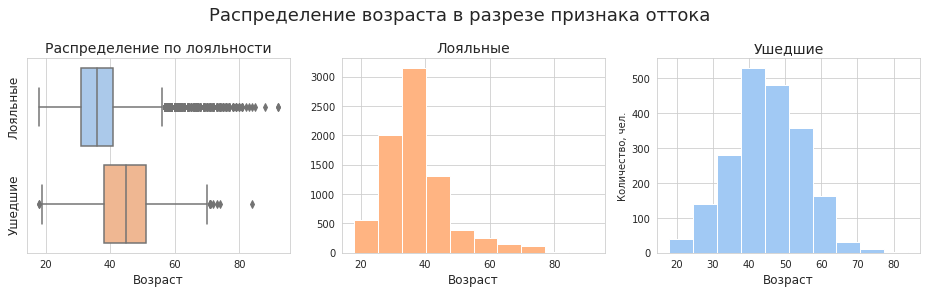

In [12]:
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

fig = plt.figure('9.4', figsize=figsize3)
fig.subplots_adjust(top=0.8)
fig.suptitle('Распределение возраста в разрезе признака оттока', fontsize=18)

axes = fig.subplots(1, 3)
ax = axes[0]
ax1 = axes[1]
ax2 = axes[2]

sns.boxplot(
    ax=ax, 
    data=churn_data, 
    y='Exited', 
    x='Age', 
    orient='h', 
    palette=[colors[0], colors[1]]
)

ax.set_yticklabels(['Лояльные', 'Ушедшие'], fontsize=12, rotation=90, va='center')

ax.set_title('Распределение по лояльности', fontsize=14)
ax.set_xlabel('Возраст', fontsize=12)
ax.set_ylabel('')

ax1.hist(churn_data[churn_data['Exited'] == 0]['Age'], color=colors[1])
ax1.set_title('Лояльные', fontsize=14)
ax1.set_xlabel('Возраст', fontsize=12)
ax1.set_ylabel('')

ax2.hist(churn_data[churn_data['Exited'] == 1]['Age'], color=colors[0])
ax2.set_title('Ушедшие', fontsize=14)
ax2.set_xlabel('Возраст', fontsize=12)
ax2.set_ylabel('Количество, чел.')

plt.show()

Комментарий
-----------
В группе людей от 55 вплоть до 95 много потенциальных выбросов.
Основной возраст ушедших в диапазоне от 40 до 50 лет.
Основное кол-во лояльных клиентов находятся в возрастной группе до 40 лет.


Выводы
-----------
Лояльно ядро клиентов находится в возрасте 30-40 лет.

Основной отток клиентов в возрасте после 40 лет. Ярко выражено наличие лояльности клиентов до 40 лет и потеря лояльности после. 

Банку следует обратить внимание прежде всего на возрастную категорию  в диапазоне от 40 до 60 лет, так как в этом диапазоне 2/3 всех ушедших клиентов.



# 9.5. Анализ взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты.

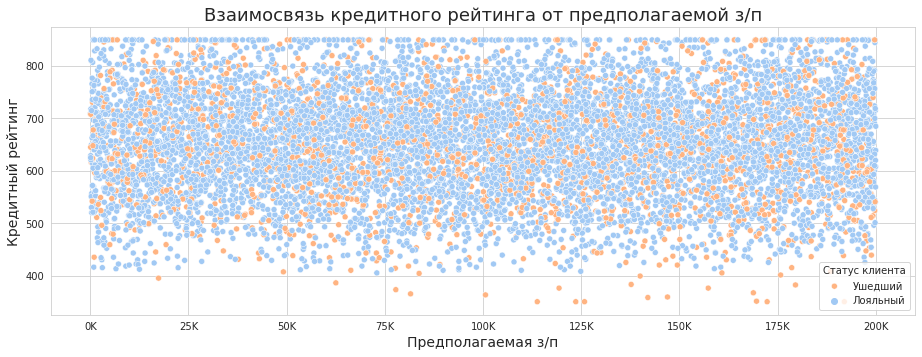

In [13]:
fig = plt.figure('9.5', figsize=figsize2)
ax = fig.add_axes([0,0,1,1])

sns.scatterplot(
    ax=ax, 
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore', 
    hue='Exited', 
    palette='pastel'
)

ax.get_xticks(minor=False)
ax.set_xticklabels([f"{round(x)}K" for x in ax.get_xticks()/1000])

ax.set_title('Взаимосвязь кредитного рейтинга от предполагаемой з/п', fontsize=18)
ax.set_xlabel('Предполагаемая з/п', fontsize=14)
ax.set_ylabel('Кредитный рейтинг', fontsize=14)

ax.legend(title='Статус клиента', labels=['Ушедший', 'Лояльный']);

plt.show()

Комментарий
-----------
График показал, что есть клиенты с высоким кредитным рейтингом и нулевым уровнем ожидаемой зарплаты. 
Это означает, что:
 
1.   Данной таблицей сравниваются клиенты работающие сами на себя, обладающие доходом не учитываемым в качестве зарплаты.
2.   Либо алгоритм вычисления предполагаемой зарплаты не совершенен и даёт очевидные погрешности не учитывая фактический доход клиента, вычисляя его уровень предполагаемой зарплаты.


Выводы
-----------
Если предположить, что алгоритм вычисления предполагаемой зарплаты верен, то мы видим, что не существует четко выраженной взаимосвязи между предполагаемой заработной платой и кредтиным рейтингом ни среди лояльных, ни среди ушедших клиентов.

Высокий уровень зарплаты и низкий кредитный рейтинг говорит о значительной закредитованности клиента, превышающей его возможности по обслуживанию кредита.

# 9.6. Кто чаще уходит, мужчины или женщины?

 Постройте график, который иллюстрирует это.


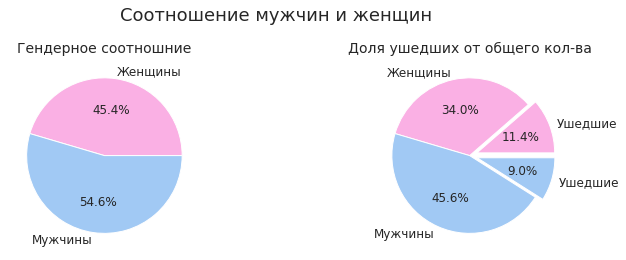

Каждая 4-ая женщина уходит из банка.
Процент утечки женщин 25 %
Каждый 6-ой мужчина уходит из банка.
Процент утечки мужчин 16 %


In [14]:
male_female = churn_data.copy()[['Gender', 'Exited']]                                     # Создаем таблицу со столбцами 'Gender', 'Exited'
male_female['Status'] = male_female['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited') # Добавляем признак Статус клиента
gender_groups = male_female.groupby('Gender')['Exited'].count().reset_index()             # Считаем отдельно сколько мужчин и женщин
gender_status = male_female.groupby(['Gender', 'Status'])['Exited'].count().reset_index() # Распределяем статус клиента по гендерному признаку 
gender_status.loc[2], gender_status.loc[3] = gender_status.loc[3], gender_status.loc[2]   # Переставляем части пирога для более красивого отображения


fig = plt.figure('9.6', figsize=figsize2)
fig.subplots_adjust(top=0.8)
fig.suptitle('Соотношение мужчин и женщин', fontsize=18)
axes = fig.subplots(1, 2)

axes[0].pie(
    gender_groups.Exited,                                 # Формируем график на основе столбца Exited
    labels=['Женщины', 'Мужчины'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    colors=[colors[6], colors[0]]
)

axes[0].set_title('Гендерное соотношние', fontsize=14)
axes[1].set_title('Доля ушедших от общего кол-ва', fontsize=14)

axes[1].pie(
    gender_status.Exited,                                 # Формируем график на основе столбца Exited
    explode=[0.1, 0, 0, 0.1], 
    labels=['Ушедшие', 'Женщины', 'Мужчины', 'Ушедшие'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    colors=[colors[6], colors[6], colors[0], colors[0]]
);

plt.show()


# Аналитика сверх задания
p_leak = round(churn_data.groupby('Gender')['Exited'].mean()*100)

# Коэффицент утечки женщин
r = 11.4 * (100 / 45.4) # Вычисляю долю ушедших женщин от общего числа клиентов
k_female = 100 / r      # Вычисляю какая по счёту женщина от пришедших уходит
print('Каждая {0}-ая женщина уходит из банка.'.format(round(k_female)))
print('Процент утечки женщин',round(p_leak[0]), '%')

# Коэффицент утечки мужчин
r2 = 9 * (100 / 54.6) # Вычисляю долю ушедших мужчин от общего числа клиентов
k_male = 100 / r2     # Вычисляю какой по счёту мужчину от пришедших уходит
print('Каждый {0}-ой мужчина уходит из банка.'.format(round(k_male)))
print('Процент утечки мужчин',round(p_leak[1]), '%')

Комментарий
-----------
Несмотря на то что женский сегмент имеет меньший удельный весь в общей базе клиентов, кол-во ушедших женщин превышает кол-во ушедших мужчин.


Выводы
-----------
*   Чаще из банка уходят женщины. 
Возможно это связано с отсутствем комфортного для женщин взаимодействия с сервисами и персоналом банка. 
Необходим дополнителный анализ со стороны контроля качества обслуживания.
*   Из банка уходит каждая четвертая женщина и каждый шестой мужчина. Или ушло 25% пришедших женщин и 16% мужчин.
*   Продуктовая линейка менее интересна женщинам, это выражено в превышенной численности мужчин и более высоким процентом оттока женщин среди клиентов.



# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?

Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

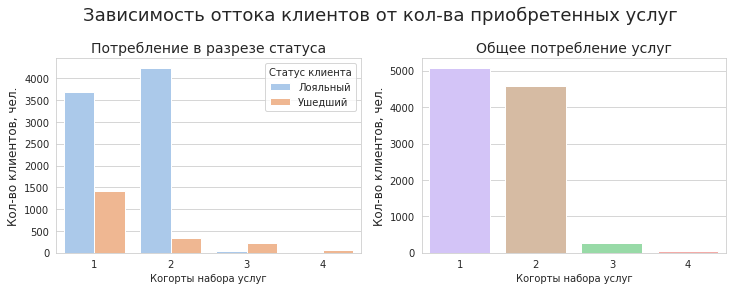

In [15]:
fig = plt.figure('9.7', figsize=figsize2)
fig.subplots_adjust(top=0.8)
fig.suptitle('Зависимость оттока клиентов от кол-ва приобретенных услуг', fontsize=18)

axes = fig.subplots(1, 2)           # Два фрейма в одну строку
ax = axes[0]

sns.barplot(
    ax=ax,
    data=churn_data,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',                   # Указываем какой столбец во фрейме данных следует использовать для кодирования цвета
    estimator=len,                  # Подсчитываем фактическое кол-во элементов.
    palette=[colors[0], colors[1]],
)

handles, labels = ax.get_legend_handles_labels()  # Создаем переменные для легенды
labels = ['Лояльный', 'Ушедший']                   # Руссифицируем категории клиентов
ax.set_title('Потребление в разрезе статуса', fontsize=14)
ax.set_ylabel('Кол-во клиентов, чел.', fontsize=12)
ax.set_xlabel('Когорты набора услуг')
ax.legend(handles, labels, title='Статус клиента')

# Делаем выборку по кол-ву приобретенных услуг и статуса лояльности
purchased_services = pd.DataFrame([churn_data.groupby('NumOfProducts')['Exited'].count()])

ax2 = axes[1]

sns.barplot(
    ax=ax2, 
    data=purchased_services, 
    palette=[colors[4], colors[5], colors[2], colors[3]]
)

ax2.set_title('Общее потребление услуг', fontsize=14)
ax2.set_ylabel('Кол-во клиентов, чел.', fontsize=12)
ax2.set_xlabel('Когорты набора услуг');

plt.show()

Комментарий
-----------
Мы рассматриваем потребление услуг по когортам, где 4 означает максимальное кол-во приобретенных услуг.

Если бы в данных была информация идентифицирующая услуги (название или ID), то можно было бы сделать более глубокий анализ влияния этого признака. 

У нас нет понимания является ли какая-то одна услуга якорной или основная масса клиентов по каким-то причинам не хочет или не может использовать более двух услуг.


Выводы
-----------
*   В продуктовой линейке банка лишь две услуги, которые являются якорными.
*   Стоит обратить внимание на то, что большинство ушедших не заинтересовалось дополнительными услугами банка.
*   Также важно отметить, что клиенты уходят даже будучие знакомыми с дополнительными услугами банка, что косвенно подтверждает наличие более интересных предложений на рынке у конкурентов.
*   Сделать выводы о лояльности или превержености клиентов к какой-либо конкретной услуги не представляется возможным по причине отсутствия более конкретной идентификации приобретенных клиентами услуг.

# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? 

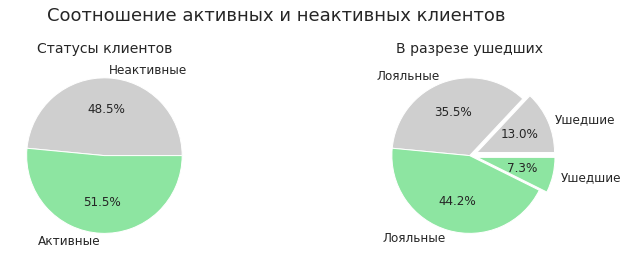

In [16]:
active_inactive = churn_data.copy()[['IsActiveMember', 'Exited']]                             # Делаем выборку Статус клиента и его данные активности 
active_inactive['Status'] = active_inactive['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')  # Добавляем новый признак статус клиента
active_inactive.rename(columns={'Exited': 'Count'}, inplace=True)                             # Переименовываем столбец который используется в роли счетчика

data1 = active_inactive.groupby('IsActiveMember')['Count'].count().reset_index()              # Группируем и подсчитываем кол-во активных клиентов

data2 = active_inactive.groupby(['IsActiveMember', 'Status'])['Count'].count().reset_index()  # Группируем и подсчитываем лояльных и ушедших клиентов
data2.loc[2], data2.loc[3] = data2.loc[3], data2.loc[2]                                       # Меняем местами доли пирога для более удобного отображения


fig = plt.figure('9.8', figsize=figsize2)
fig.subplots_adjust(top=0.8)
fig.suptitle('Соотношение активных и неактивных клиентов', fontsize=18)
axes = fig.subplots(1, 2)

axes[0].pie(
    data1.Count,                    # Формируем пирог на основе столбца  data1[Count]
    labels=['Неактивные', 'Активные'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    startangle=0,
    colors=[colors[7], colors[2]]
)

axes[0].set_title('Статусы клиентов', fontsize=14)
axes[1].set_title('В разрезе ушедших', fontsize=14)

axes[1].pie(
    data2.Count,                  # data2[Count]
    explode=[0.1, 0, 0, 0.1], 
    labels=['Ушедшие', 'Лояльные', 'Лояльные', 'Ушедшие'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    colors=[colors[7], colors[7], colors[2], colors[2]]
);

Комментарий
-----------
В обоих группах, "активных" и "неактивных", клиентов есть лояльные. Очевидно, что есть причины потери активных пользователей и скорее всего продуктовый отдел банка недорабатывает по условиям для клиентов, и есть утечка к конкурентам на более выгодные. 


Выводы
-----------
Неактивные клиенты примерно в два раза чаще уходят из банка.
Около половины клиентов не используют активно услуги банка и это потенциальная точка роста.


Предложения
-----------
*  Активизировать работу с лояльными неактивными клиентами. 
Выяснить причину неиспользования услуг банка.
*   Разработать дополнительный набор услуг опираясь на данные опроса неактивной части клиентов
*   Проанализировтаь продуктовую линейку конкурентов. 
Разработать на основе анализа более интересный пакет предложений 
*   Уделить внимание женской аудитории и возрастной группе от 40 до 50 лет.




 


# 9.9. Тепловая карта отображающая доли ушедших клиентов по странам

In [17]:
ch = churn_data[['Geography', 'Exited']]                                        # Формируем список стран
ch = ch.groupby('Geography').agg(['count', 'sum']).reset_index()                # Суммируем кол-во ушедших в столбце sum
ch['ExitedPercent'] = round(ch['Exited']['sum'] / ch['Exited']['count'] * 100)  # Вычисляем процент ушедших
ch.rename(columns={'ExitedPercent': 'Процент ушедших', 'Geography': 'Страна'}, inplace=True)# Переименовываем для корректного отображения на графике

fig = px.choropleth(
    data_frame=ch,
    locations='Страна',
    locationmode = 'country names',
    color='Процент ушедших',
    range_color=[0, 50],
    title='География распределения ушедших клиентов',
    width=600,
    height=400,
    color_continuous_scale='Reds',
    scope='europe',
);

fig.show()

Комментарий
-----------
Банк представлен только в трех странах:
Франция, Германия и Испания.
Во Франции и Испании процент ушедших относительно на одном уровне.
В Германии отток клиентов в два раза выше чем в остальных странах. 


Предположения
-----------
Отток клиентов может быть связан:
*   С недостаточным количеством отделений в этой стране
*   С плохой локализацией сервисов;
*   С плохим сервисом и/или персоналом;
*   С наличием на рынке более интересных продуктов у конкурентов.


Выводы
-----------
Банку необходимо более глубокое исследование причин оттока клиентов (маркетинговое исследование рынка, анализ работы по контролу качества, анализ представленности)

# 9.10. Тепловая карта кредитного рейтинга клиентов с аннотацией в разрезе оттока.

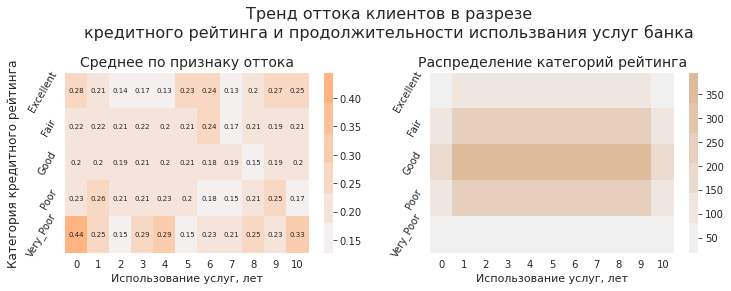

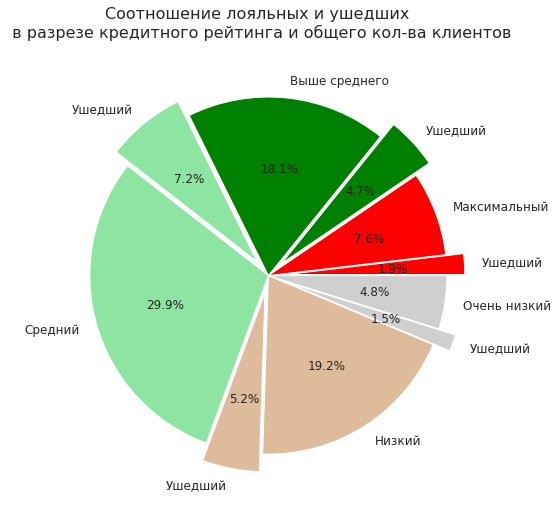

In [19]:
def get_credit_score_cat(credit_score):
    """Функция определения категории кредитного рейтинга.
    """
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"


ch = churn_data.copy()                                                # Копируем из основного датасета в переменную для последующей трансформации
ch['CreditScoreCat'] = ch['CreditScore'].apply(get_credit_score_cat)  # Создаем новый признак Категория кредитного рейтинга.Заполняем примененяя функцию
ch['CreditScoreCat'] = ch['CreditScoreCat'].astype('category')

summary_table = ch.pivot_table(
    index='CreditScoreCat',     # Категории кредитного рейтинга (CreditScoreCat)
    columns='Tenure',           # Количество лет, в течение которых клиент пользуется услугами банка (Tenure)
    values='Exited',            # Статус клиента
    aggfunc='mean',             # В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
)

fig = plt.figure('9.10', figsize=figsize2)
fig.subplots_adjust(top=0.75)
fig.suptitle('Тренд оттока клиентов в разрезе\n\
кредитного рейтинга и продолжительности использвания услуг банка', fontsize=16)

axes = fig.subplots(1, 2)             # Указывем кол-во строк и кол-во графиков в строке
ax = axes[0]
ax2 = axes[1]


sns.heatmap(
    ax=ax,
    data=summary_table,
    annot=True,                       # Отображаем цифровое значение
    annot_kws={'size': 7},            # Задаем размер шрифта внтури ячейки
    cmap=sns.light_palette(colors[1]) # Задаем цветовую палитру ячеек
)

ax.set_title('Среднее по признаку оттока', fontsize=14)
ax.set_ylabel('Категория кредитного рейтинга', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=60) # Меняем отображение категорий рейтинга под углом
ax.set_xlabel('Использование услуг, лет', fontsize=11)


summary_table_2 = ch.pivot_table(
    index='CreditScoreCat',       # категории кредитного рейтинга (CreditScoreCat)
    columns='Tenure',             # количество лет, в течение которых клиент пользуется услугами банка (Tenure)
    values='Exited',              # Данные берём из столбца со статусами клиентов
    aggfunc='count',              # График строим опираясь на кол-во клиентов
)

sns.heatmap(
    ax=ax2,
    data=summary_table_2,
    cmap=sns.light_palette(colors[5])
)

ax2.set_title('Распределение категорий рейтинга', fontsize=14)
ax2.set_ylabel('')
ax2.set_yticklabels(ax.get_yticklabels(), rotation=60)
ax2.set_xlabel('Использование услуг, лет', fontsize=11);

plt.show()


summary_table_4 = ch.copy()[['CreditScoreCat', 'Exited']]                                               # Делаем выборку категория рейтинга и статус клиента
summary_table_4['Status'] = summary_table_4['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Exited')  # Добавляем новый признак статус клиента
summary_table_4.rename(columns={'Exited': 'Count'}, inplace=True)                                       # Переименовываем столбец который теперь счетчик статусов

data3 = summary_table_4.groupby(['CreditScoreCat', 'Status'])['Count'].count().reset_index()# На основании выборки делаем необходимые группировки

fig = plt.figure('9.10.1', figsize=(10, 8))
fig.subplots_adjust(top=0.9)
fig.suptitle('Соотношение лояльных и ушедших \n в разрезе кредитного рейтинга и общего кол-ва клиентов', fontsize=16)
axes = fig.subplots(1, 1)

axes.pie(
    data3.Count,                                          # Формируем пирог на основе столбца Count
    explode=[0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0],     # Акцентируем долю ушедших
    labels=['Ушедший', 'Максимальный', 'Ушедший', 'Выше среднего', 'Ушедший', 'Средний', 'Ушедший', 'Низкий', 'Ушедший', 'Очень низкий'], 
    autopct='%1.1f%%',
    textprops={'fontsize': 12},
    colors=['red', 'red', 'green', 'green', colors[2], colors[2], colors[5], colors[5], colors[7], colors[7]]
);

plt.show()

Комментарий
-----------
Наименьший отток клиентов в первый и 10 год использовани услуг банка в категории Very_Poor(очень низкий рейтинг), с рейтингом до 500 пунктов. 

Самая многочисленная категория Good (средний рейтинг). Ушедших в ней 7.2% от общего числа клиентов.

В категории Fair (выше среднего) и Poor (низкий) ушедших 4.7% и 5.2% от общего числа клиентов.


Выводы
-----------
Чаще всего уходят клиенты с очень низким кредитным рейтингом, но данная категория является одной из самых малочисленных, удельный вес ушедших, в которой, в общей массе клиентов составляет 1.5%.

Стоит обратить внимание на отток целевой аудитории для банковских продуктов, клиентов с высоким, средним и выше среднего кредитными рейтингами, которая составляет почти половину от всего кол-ва ушедших.

Клиенты сотрудничающие с банком 10 лет имеют высокий уровень лояльности.